In [2]:
import os, sys
from Tox21experiment_helper import *

sys.path.append(os.path.join("..", "..", "0_code"))

from algorithms import attention_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tf_helpers import get_weights_dicts, BinaryCrossEntropyIgnoreNan
# from tf_helpers import SimilarityBatchingDataset
from tf_helpers import AveragedAUCIgnoreNan

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.keras.backend.set_floatx('float32')


In [4]:
from sklearn.preprocessing import StandardScaler
labels, all_train_features, test_features, all_train_targets, test_targets, train_id_df, test_id_df, all_train_Fweights, test_Fweights = load_data()

feature_scaler = StandardScaler()
target_scaler = None

train_features_scaled, test_features_scaled, train_target_scaled, test_target_scaled, feature_scaler, target_scaler = data_scaling(
    feature_scaler, 
    target_scaler, 
    all_train_features, 
    test_features, 
    all_train_targets, 
    test_targets
)


In [5]:
for root, dirs, files in os.walk("Parameter_finding"):
    break
# Get latest files

dirs = list(filter(lambda x: "LSwFW__Tox21_n_attention" in x, dirs))


In [18]:
#Storm the directories
all_results = pd.DataFrame()
for dir_ in dirs:
    model_folder = os.path.join("Parameter_finding",
                              dir_
                             )
    model_path = os.path.join(model_folder, 
                              "saved_model"
                             )
    checkpoint_path = os.path.join(model_folder, 
                                   "model_checkpoint"
                                  )
    tf_model = load_tf_model(model_path, 
                             checkpoint_path
                            )
    n_attention = dir_.split('_')[6]
    n_attention_out = dir_.split('_')[-1]
    results_df = evaluate_Tox21model(tf_model, 
                                np.hstack([test_features_scaled, 
                                           test_Fweights]), 
                                test_targets, 
                                split = 0, 
                                labels = labels, 
                                target_scaler = target_scaler, 
                                predict_thresh = 'a_priori', 
                                Y_train = all_train_targets,
                                write_to_file_path = None
                               )
    results_df['n_attention'] = n_attention
    results_df['n_attention_out'] = n_attention_out
    all_results = pd.concat([all_results, results_df])

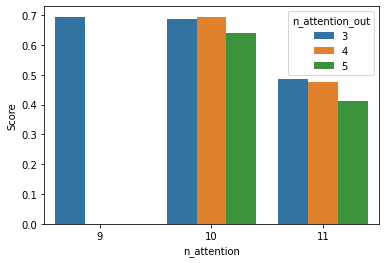

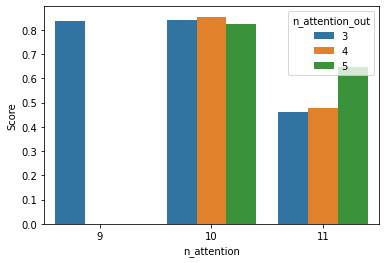

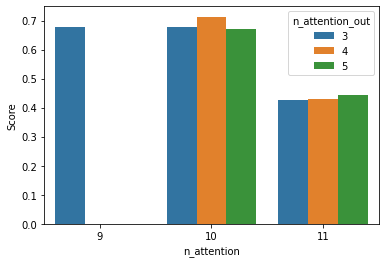

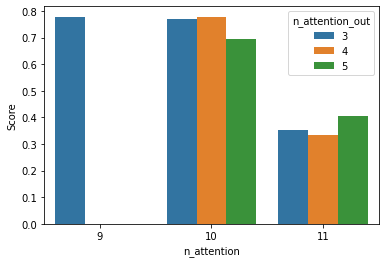

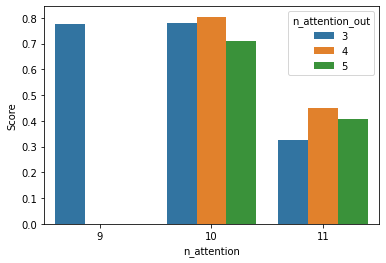

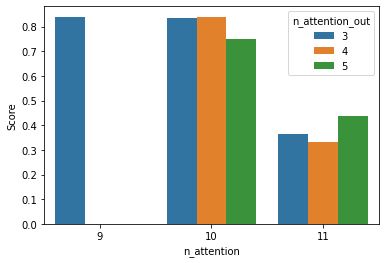

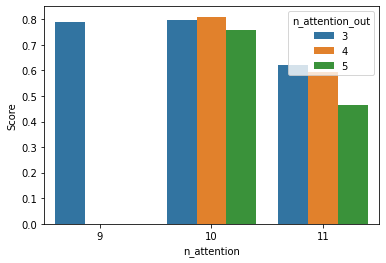

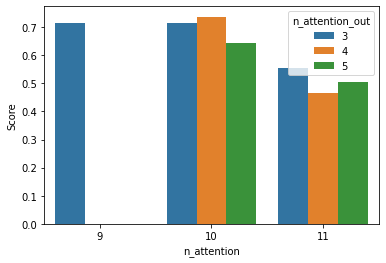

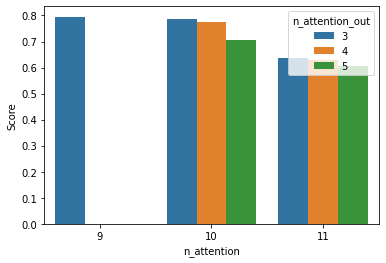

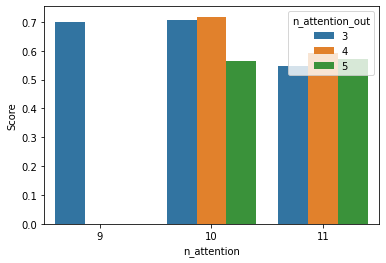

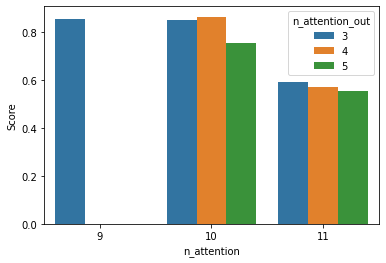

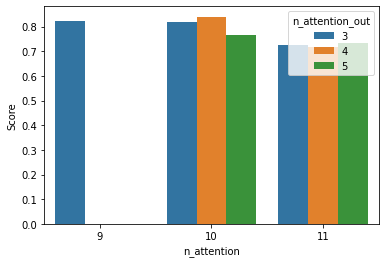

In [24]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
for label in labels:
    sns.barplot(x = 'n_attention', 
                y = "Score",
                hue = 'n_attention_out',
                data = all_results.query("Metric =='AUC' & Label == @label")
                )
    plt.show()

Selected parameters: n_attention = 10; n_attention_out = 4

In [19]:
all_results.head()

,Model,Split,Label,Metric,Score,n_attention,n_attention_out
0,LS_model,0,NR-AR,AUC,0.694346,9,3
1,LS_model,0,NR-AR,f1,0.076503,9,3
2,LS_model,0,NR-AR,acc,0.706087,9,3
3,LS_model,0,NR-AhR,AUC,0.838602,9,3
4,LS_model,0,NR-AhR,f1,0.384615,9,3
